# Import

In [1]:
from sklearn.datasets import load_boston

In [5]:
import pandas as pd

In [16]:
import numpy as np 
from os import path
import pandas as pd 
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
tickfontsize=20
labelfontsize = tickfontsize

import datetime

import math

import time

import random

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Load data

In [2]:
boston = load_boston()

# Process data

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
target = boston.target

In [14]:
data = data.drop("PRICE", axis=1)

In [18]:
len(data)

506

# Build Model

In [31]:
# define the keras model
def build_model():
    model = keras.Sequential([
        layers.Dense(100, activation='relu', input_shape=[len(data.keys())]), #default is 100
        #layers.Dense(100, activation='relu'), #default is not exist
        #layers.Dropout(.1), #default is not exist
        #layers.Dense(100, activation='relu'), #default is not exist
        #layers.Dropout(.1), #default is not exist
        layers.Dense(100, activation='relu'), #default is 100
        #layers.Dropout(.1), #default is not exist
        layers.Dense(100, activation='relu'), #default is 100
        #layers.Dropout(.1), #default is not exist
        #layers.Dense(1)
        layers.Dense(1, activation='linear') #default activation is None
    ])

#     model = keras.Sequential([
#         layers.Dense(400, activation='relu', input_shape=[len(train_fp.keys())]),
#         layers.Dense(400, activation='relu'),
#         layers.Dense(100, activation='relu'),
#         #layers.Dense(1)
#         layers.Dense(1, activation='linear')
#     ])

    opt = keras.optimizers.Adam(learning_rate=.001) #default is .001
    
    model.compile(loss='mse',
        optimizer=opt,
        metrics=['mae', 'mse'])
    return model

model = build_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 21,701
Trainable params: 21,701
Non-trainable params: 0
_________________________________________________________________


# Training

In [32]:
patience = 10

In [33]:
# NN model training
start = time.time()

EPOCHS = 1000

model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
checkpoint_callbacks = keras.callbacks.ModelCheckpoint(filepath='model_checkpoint.h5', monitor='val_loss',\
                                                      verbose=1, save_best_only=True, mode='min')

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# early_history = model.fit(train_fp.to_numpy(), train_label.to_numpy(), batch_size=1000,
#                     epochs=EPOCHS, validation_split = 0.2, verbose=1,\
#                           callbacks=[early_stop,checkpoint_callbacks,tfdocs.modeling.EpochDots(),tensorboard_callback])

#default below

early_history = model.fit(data.to_numpy(), target, batch_size=32,
                    epochs=EPOCHS, validation_split = 0.2, verbose=1,\
                          callbacks=[early_stop,checkpoint_callbacks,tfdocs.modeling.EpochDots(),tensorboard_callback])
##############################################


# early_history = model.fit(train_data,
#                         epochs=EPOCHS, validation_data = train_data, verbose=1,\
#                               callbacks=[early_stop,checkpoint_callbacks,tfdocs.modeling.EpochDots(),tensorboard_callback])

end = time.time()

print("Time elapsed: ", end-start)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
320/404 [======================>.......] - ETA: 0s - loss: 172.8478 - mae: 10.5071 - mse: 172.8478
Epoch 00001: val_loss improved from inf to 404.46692, saving model to model_checkpoint.h5

Epoch: 0, loss:166.7479,  mae:10.0908,  mse:166.7478,  val_loss:404.4669,  val_mae:18.7984,  val_mse:404.4669,  
404/404 [==============================] - 1s 1ms/sample - loss: 166.7479 - mae: 10.0908 - mse: 166.7478 - val_loss: 404.4669 - val_mae: 18.7984 - val_mse: 404.4669
Epoch 2/1000
320/404 [======================>.......] - ETA: 0s - loss: 89.1160 - mae: 7.2212 - mse: 89.1160   
Epoch 00002: val_loss improved from 404.46692 to 330.06866, saving model to model_checkpoint.h5
404/404 [==============================] - 0s 334us/sample - loss: 93.0413 - mae: 7.0776 - mse: 93.0413 - val_loss: 330.0687 - val_mae: 13.6041 - val_mse: 330.0687
Epoch 3/1000
384/404 [===========================>..] - ETA: 0s - loss: 91.4823 - mae: 7.0811 - mse: 

Epoch 25/1000
352/404 [=========================>....] - ETA: 0s - loss: 40.1230 - mae: 4.6869 - mse: 40.1230
Epoch 00025: val_loss improved from 54.05709 to 36.58179, saving model to model_checkpoint.h5
404/404 [==============================] - 0s 304us/sample - loss: 36.8902 - mae: 4.4691 - mse: 36.8902 - val_loss: 36.5818 - val_mae: 5.0612 - val_mse: 36.5818
Epoch 26/1000
320/404 [======================>.......] - ETA: 0s - loss: 35.4977 - mae: 4.2574 - mse: 35.4977
Epoch 00026: val_loss did not improve from 36.58179
404/404 [==============================] - 0s 247us/sample - loss: 36.6239 - mae: 4.4070 - mse: 36.6239 - val_loss: 56.1256 - val_mae: 6.1122 - val_mse: 56.1256
Epoch 27/1000
 32/404 [=>............................] - ETA: 0s - loss: 28.9387 - mae: 4.4758 - mse: 28.9387
Epoch 00027: val_loss did not improve from 36.58179
404/404 [==============================] - 0s 197us/sample - loss: 36.8008 - mae: 4.3566 - mse: 36.8008 - val_loss: 121.7792 - val_mae: 8.6140 - val_m

Text(0, 0.5, 'MAE')

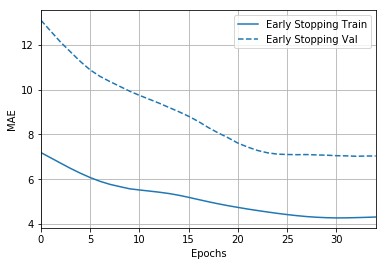

In [34]:
# Check if run converged
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Early Stopping': early_history}, metric = "mae")
#plt.ylim([0, 0.15])
plt.ylabel('MAE')

# Plot results

This is Test RMSE:  6.48104844055062


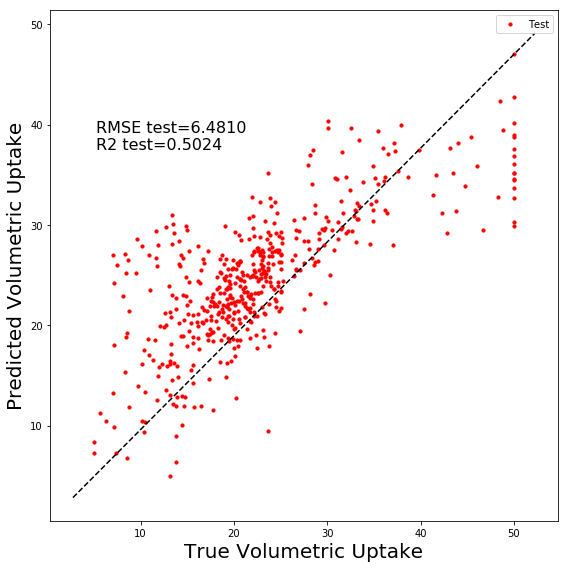

In [35]:
def get_rmse(a, b):
    '''
    Compute rmse between a and b
    '''
    return math.sqrt(np.mean(np.square(np.subtract(a, b))))


test_predictions = model.predict(data.to_numpy()).flatten()

# #normalize test values
# mean = float(ml_data['mean_CH4_v/v_1_bar'][0])
# std = float(ml_data['std_CH4_v/v_1_bar'][0])
# res_test_predictions = (test_predictions * std) + mean
# res_test_label = (test_label * std) + mean
# res_train_label = (train_label * std) + mean
# ################



# Evaluation of test error and plotting parity

#model = tf.keras.models.load_model('model_checkpoint_bandgap.h5')



fig1,ax1 = plt.subplots(figsize = (8,8))


#plot un-normed
#loss, mae, mse = model.evaluate(test_fp.to_numpy(), res_test_label.to_numpy(), verbose=2)
#print("Testing set Mean Abs Error: {:5.2f} bg".format(mae))
#tr_loss, tr_mae, tr_mse = model.evaluate(train_fp.to_numpy(), res_train_label.to_numpy(), verbose=2)
#tr_rmse = math.sqrt(tr_mse)
#rmse = math.sqrt(mse)
rmse = get_rmse(target, test_predictions)

from sklearn.metrics import r2_score as r2

r2_val = r2(y_true=target, y_pred=test_predictions)
#r2_tr = r2(y_true=res_train_label, y_pred=res_train_predictions)

print("This is Test RMSE: ", rmse)
#print("This is Train RMSE: ", tr_rmse)

ax1.scatter(target, test_predictions, c='r',s=10, label='Test')
ax1.set_xlabel('True Volumetric Uptake',fontsize=labelfontsize)
ax1.set_ylabel('Predicted Volumetric Uptake',fontsize=labelfontsize)
#max_val = max([max(res_test_label),max(res_test_predictions)])+1
#ax1.set_xlim(0, max_val)
#ax1.set_ylim(0, max_val)

##############################

#default
# loss, mae, mse = model.evaluate(test_fp.to_numpy(), test_label.to_numpy(), verbose=2)
# print("Testing set Mean Abs Error: {:5.2f} bg".format(mae))

# tr_loss, tr_mae, tr_mse = model.evaluate(train_fp.to_numpy(), train_label.to_numpy(), verbose=2)

# tr_rmse = math.sqrt(tr_mse)
# rmse = math.sqrt(mse)
#ax1.scatter(test_label, test_predictions, c='r',s=10) 
#ax1.scatter(train_label, train_predictions, c='b',s=10)
# ax1.set_xlabel('True normalized CH4 Uptake @ 1 bar',fontsize=labelfontsize)
# ax1.set_ylabel('Predicted normalized CH4 Uptake @ 1 bar',fontsize=labelfontsize)
#ax1.set_xlim(min([min(test_label),min(test_predictions)])-1,max([max(test_label),max(test_predictions)])+1)
#ax1.set_ylim(min([min(test_label),min(test_predictions)])-1,max([max(test_label),max(test_predictions)])+1)
###############################################
ax1.legend()
plot_x_min, plot_x_max = plt.xlim()
plot_y_min, plot_y_max = plt.ylim()

ax1.plot(np.linspace(plot_x_min,plot_x_max,100),np.linspace(plot_y_min,plot_y_max,100),c='k',ls='--')
text_position_x = plot_x_min + (plot_x_max - plot_x_min) * 0.05
text_position_y = plot_y_max - (plot_y_max - plot_y_min) * 0.25

#ax1.text(text_position_x, text_position_y, "RMSE test=" + str("%.4f" % rmse), ha='left', fontsize=16)

ax1.text(text_position_x, text_position_y, "RMSE test=" + str("%.4f" % rmse) + '\n' + 
         "R2 test=" + str("%.4f" % r2_val), ha='left', fontsize=16)

# ax1.text(text_position_x, text_position_y, "MAE=" + str("%.4f" % mae) + ' \n' + 
#          "MSE=" + str("%.4f" % mse), ha='left', fontsize=16)
fig1.tight_layout()
#plt.savefig('./%s_test_parity_%s.png'%(property_used, total_frac),dpi=200)